Min Accuracy Error:
0.09772727272727277
{'C': 6, 'gamma': 0.01}


/Users/tfc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


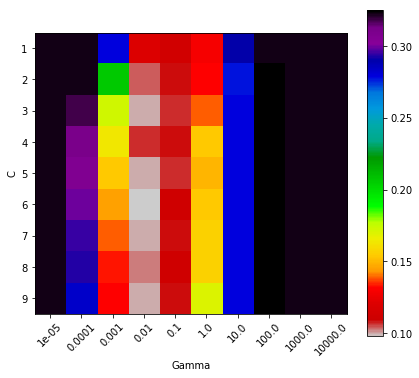

In [191]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
import sklearn.linear_model as lm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm, grid_search



from sklearn.preprocessing import StandardScaler

df_svm = pd.read_csv('wholesale-customers.csv', sep=',')
df_svm.head()
X_svm = df_svm.drop(columns = ["Channel"])
y_svm = df_svm["Channel"]

for i in range(440):
    y_svm[i] = (-1) ** y_svm[i]

    
    
scaler = StandardScaler()
X_svm = scaler.fit_transform(X_svm)    
    
#Cs = 10. ** np.arange(-2,5)
Cs = [1,2,3,4,5,6,7,8,9]
g = np.logspace(-5, 4, 10)

def split_selector(X, y):
    X_train, X_test, y_train, y_test =train_test_split(X, y , test_size=0.3)
cv = split_selector(X_svm,y_svm)

X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm , test_size=0.3)

p_grid = {'C': Cs ,'gamma' : g}
cross_val = GridSearchCV(SVC(), p_grid, scoring = "accuracy",cv=cv)
cross_val.fit(X_svm, y_svm)
cross_val.best_params_

score = cross_val.grid_scores_
scores = [x[1] for x in score]

scores = 1 - np.array(scores).reshape(len(Cs), len(g))

print('Min Accuracy Error:')
print(np.min(scores))
print(cross_val.best_params_)

pl.figure(figsize=(7, 6))
pl.imshow(scores, cmap=pl.cm.spectral_r)
pl.ylabel('C')
pl.xlabel('Gamma')
pl.xticks(np.arange(len(g)), g, rotation=45)
pl.yticks(np.arange(len(Cs)), Cs)
pl.colorbar()
pl.show()

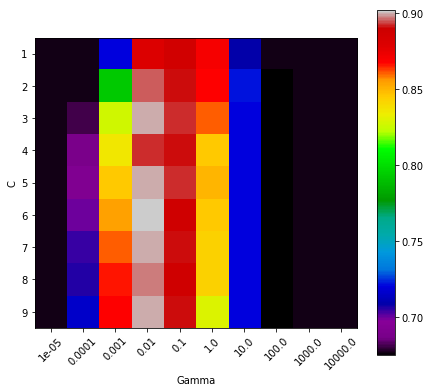

In [139]:
pl.figure(figsize=(7, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, cmap=pl.cm.spectral)
pl.xlabel('Gamma')
pl.ylabel('C')
pl.xticks(np.arange(len(g)), g, rotation=45)
pl.yticks(np.arange(len(Cs)), Cs)
pl.colorbar()
pl.show()

In [135]:
print(score)

[mean: 0.67727, std: 0.00113, params: {'C': 1, 'gamma': 1e-05}, mean: 0.67727, std: 0.00113, params: {'C': 1, 'gamma': 0.0001}, mean: 0.72045, std: 0.01133, params: {'C': 1, 'gamma': 0.001}, mean: 0.87955, std: 0.01650, params: {'C': 1, 'gamma': 0.01}, mean: 0.88636, std: 0.01210, params: {'C': 1, 'gamma': 0.1}, mean: 0.87045, std: 0.01548, params: {'C': 1, 'gamma': 1.0}, mean: 0.70909, std: 0.00839, params: {'C': 1, 'gamma': 10.0}, mean: 0.67727, std: 0.00113, params: {'C': 1, 'gamma': 100.0}, mean: 0.67727, std: 0.00113, params: {'C': 1, 'gamma': 1000.0}, mean: 0.67727, std: 0.00113, params: {'C': 1, 'gamma': 10000.0}, mean: 0.67727, std: 0.00113, params: {'C': 2, 'gamma': 1e-05}, mean: 0.67727, std: 0.00113, params: {'C': 2, 'gamma': 0.0001}, mean: 0.79318, std: 0.01072, params: {'C': 2, 'gamma': 0.001}, mean: 0.89545, std: 0.00614, params: {'C': 2, 'gamma': 0.01}, mean: 0.89091, std: 0.00617, params: {'C': 2, 'gamma': 0.1}, mean: 0.86818, std: 0.01236, params: {'C': 2, 'gamma': 1.0

In [161]:
X_train, X_test, y_train, y_test =train_test_split(X_svm, y_svm , test_size=0.3)
final = SVC(kernel='rbf',gamma=0.01,C=6)
final.fit(X_train,y_train)
final.dual_coef_

array([[-6.        , -6.        , -6.        , -6.        , -6.        ,
        -6.        , -6.        , -6.        , -6.        , -6.        ,
        -6.        , -6.        , -6.        , -1.19810968, -6.        ,
        -6.        , -6.        , -6.        , -6.        , -6.        ,
        -6.        , -4.1302061 , -6.        , -6.        , -6.        ,
        -6.        , -6.        , -6.        , -6.        , -6.        ,
        -6.        , -6.        , -6.        , -6.        , -6.        ,
        -6.        , -6.        , -6.        , -6.        , -6.        ,
        -6.        , -2.04558677, -6.        , -4.55968403, -6.        ,
        -6.        , -6.        , -6.        , -6.        , -6.        ,
         6.        ,  6.        ,  6.        ,  3.16765394,  6.        ,
         6.        ,  0.18342533,  6.        ,  6.        ,  6.        ,
         6.        ,  6.        ,  6.        ,  6.        ,  6.        ,
         6.        ,  6.        ,  6.        ,  6. 

NoneType